In [83]:
from math import sin
import matplotlib.pyplot as plt

In [84]:
# initial function
def f(x_):
    return 13 * sin(x_ - 13)

In [85]:
# tabulation function
def tabulation(a, b, N):
    xl, yl = [], []
    h = (b - a)/N
    x = a
    while a <= x <= b:
        xl.append(x)
        yl.append(f(x))
        x += h
    return [xl, yl]

In [86]:
# driving method
def P(y, h, N):
    alpha, beta, gamma, delta, A, B = [0.0] * (N + 1), [0.0] * (N + 1), [0.0] * (N + 1), \
                                      [0.0] * (N + 1), [0.0] * (N + 1), [0.0] * (N + 1)
    beta[1] = 1.0
    for i in range(2, N + 1):
        alpha[i] = h
        beta[i] = 4 * h
        gamma[i] = h
        delta[i] = 3 * (((y[i] - y[i - 1])/h) - ((y[i - 1] - y[i - 2])/h))
    gamma[N] = 0.0
    A[1] = -gamma[1]/beta[1]
    B[1] = delta[1]/beta[1]
    for j in range(2, N + 1):
        A[j] = -gamma[j]/(alpha[j] * A[j - 1] + beta[j])
        B[j] = (delta[j] - alpha[j] * B[j - 1])/(alpha[j] * A[j - 1] + beta[j])
    c = [0.0] * (N + 1)
    c[N] = (delta[N] - alpha[N] * B[N - 1])/(alpha[N] * A[N - 1] + beta[N])
    for k in range(N, 1, -1):
        c[k - 1] = A[k - 1] * c[k] + B[k - 1]
    return c

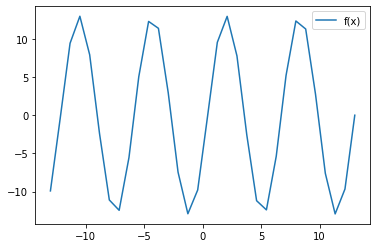

In [87]:
# plot for the tabulated function
N = 31
k = 13
h = (k + k)/N
[x, y] = tabulation(-k, k, N)
plt.plot(x, y)
plt.legend(['f(x)'])
plt.show()

In [88]:
# finding coefficients for the c
c = P(y, h, N)

In [89]:
# calculating a, b, d coefficients
a, b, d = [0.0] * (N + 1), [0.0] * (N + 1), [0.0] * (N + 1)
for i in range(1, N):
    a[i] = y[i - 1]
    b[i] = (y[i] - y[i - 1])/h - (h/3) * (c[i + 1] + 2*c[i])
    d[i] = (c[i + 1] - c[i])/(3 * h)
a[N] = y[N - 1]
b[N] = (y[N] - y[N - 1])/h - (2.0/3.0)*h*c[N]
d[N] = -c[N]/(3*h)

In [90]:
hh = h/20
xm, ym = [], []
for i in range(0, 20*N + 1):
    xm.append(x[0] + i*hh)
    ym.append(f(xm[i]))

In [91]:
s, eps = [], []
j = 1
for i in range(0, 20*N + 1):
    s.append(a[j] + b[j]*(xm[i] - x[j - 1]) + c[j]*(xm[i] - x[j - 1])*(xm[i] - x[j - 1]) \
             + d[j]*(xm[i] - x[j - 1])*(xm[i] - x[j - 1])*(xm[i] - x[j - 1]))
    eps.append(abs(s[i] - ym[i]))
    if i != 0 and (i % 20) == 0:
        j = j + 1

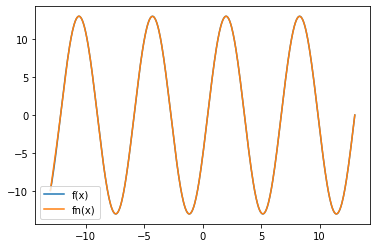

In [92]:
# plot for the function and aproximated value
plt.plot(xm, ym)
plt.plot(xm, s)
plt.legend(['f(x)', 'fn(x)'])
plt.show()

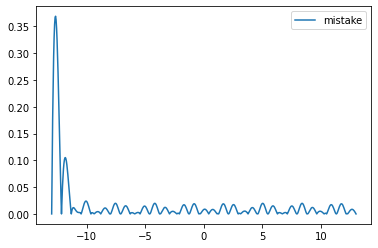

In [93]:
# accuracy
plt.plot(xm, eps)
plt.legend(['mistake'])
plt.show()